# Análisis exploratorio de datos

Contentesta las siguientes preguntas escribiendo el código de Python necesario para encontrar las respuestas o producir las gráficas necesarias

---


In [3]:
# No mostrar advertencias
import warnings

from scipy.stats import pearsonr

warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

### 1. ¿Cuál es la distribución de edades de los clientes?
- **Objetivo**: Comprender la distribución de las edades en el conjunto de datos.
- **Respuesta esperada**: Un histograma de la columna Age.

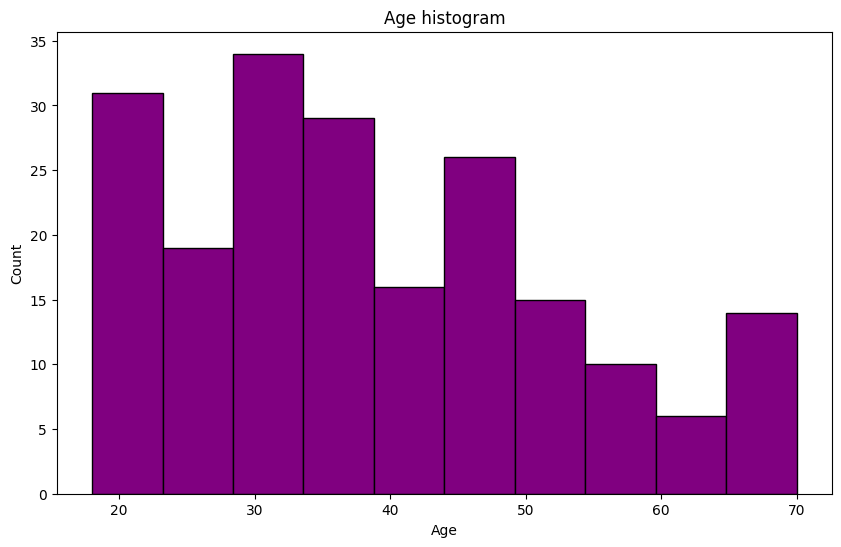

In [25]:
# Setear dataframe:
df = pd.read_csv('data/retailmax.csv')

# Limpiar datos:
# print(df.columns) # Revisar los nombres de las columnas
df.rename(columns={'Annual Income (k$)' : 'AnnualIncome'}, inplace=True) # Re mappear los nombres para limpiarlos
df.rename(columns={'Spending Score (1-100)' : 'SpendingScore'}, inplace=True) # Re mappear los nombres para limpiarlos
# Heatmap valores nulos
plt.figure(figsize=(10,6))
# sns.heatmap(df.isnull(), cbar=False, cmap='viridis', yticklabels=False) # No hay nulos
# plt.title('Nulls in data')
# plt.show()
# print(df.isnull().mean() * 100)

plt.hist(df['Age'], bins=10, color='purple', edgecolor='black')
plt.title('Age histogram')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

### 2. ¿Existen diferencias significativas en los ingresos anuales entre hombres y mujeres?
- **Objetivo**: Comparar la distribución de ingresos anuales entre géneros.
- **Respuesta esperada**: Una gráfica de cajas (boxplot) que muestre la distribución de Annual Income (k$) por género.

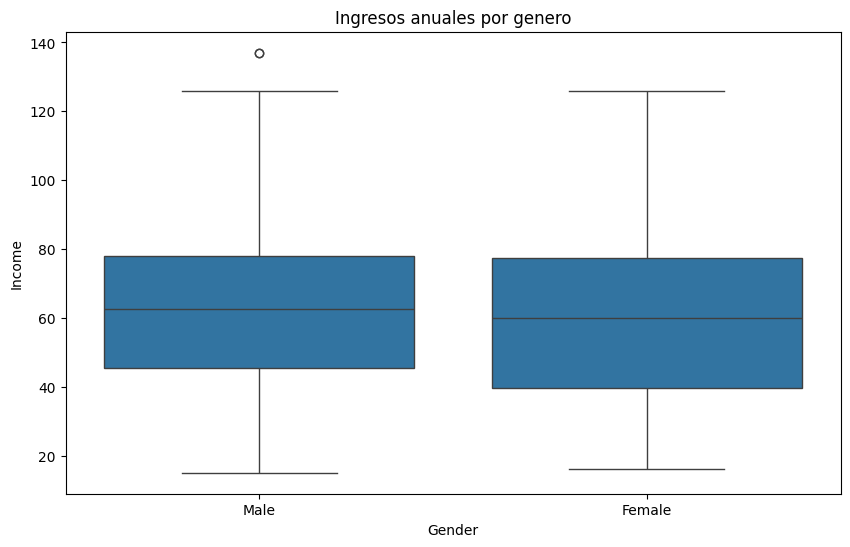

In [28]:
# print(df.columns) # Revisar los nombres de las columnas
plt.figure(figsize=(10,6))
sns.boxplot(x='Gender',y='AnnualIncome', data=df)
plt.title('Ingresos anuales por genero')
plt.xlabel('Gender')
plt.ylabel('Income')
plt.show()

### 3. ¿Cómo se distribuye la puntuación de gasto (Spending Score) entre los diferentes rangos de edad?
- **Objetivo**: Analizar la relación entre la edad y la puntuación de gasto.
- **Respuesta esperada**: Una gráfica de dispersión (scatter plot) o un gráfico de cajas que compare la Spending Score (1-100) con diferentes grupos de edad.

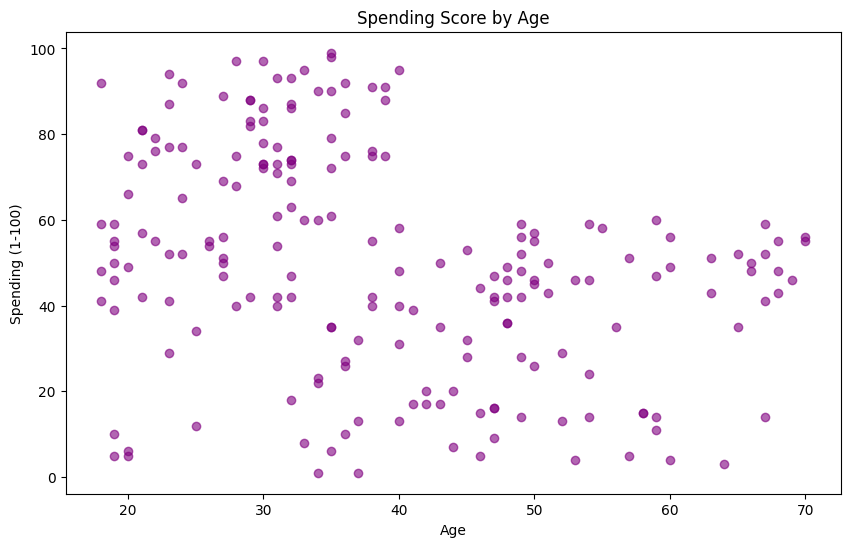

In [29]:
plt.figure(figsize=(10,6))
plt.scatter(df['Age'], df['SpendingScore'], color='purple', alpha=0.6)
plt.title('Spending Score by Age')
plt.xlabel('Age')
plt.ylabel('Spending (1-100)')
plt.show()

### 4. ¿Cuál es la correlación entre el ingreso anual y la puntuación de gasto?
- **Objetivo**: Identificar si existe una relación lineal entre el ingreso y el gasto.
- **Respuesta esperada**: Una gráfica de dispersión y el cálculo del coeficiente de correlación entre Annual Income (k$) y Spending Score (1-100).

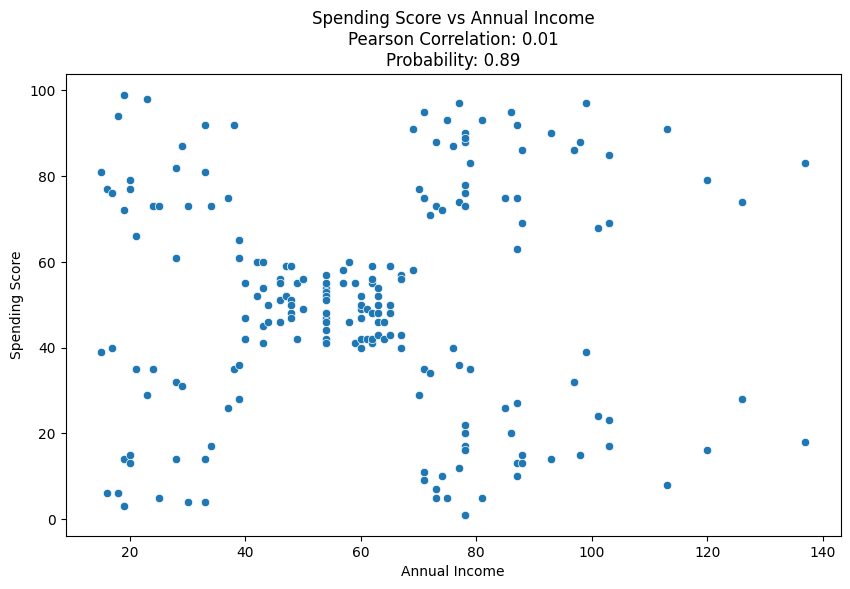

In [39]:
# Calcular correlacion:
from scipy.stats import pearsonr
corr, p_value = pearsonr(df['AnnualIncome'], df['SpendingScore'])

plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='AnnualIncome', y='SpendingScore')
plt.title(f'Spending Score vs Annual Income\nPearson Correlation: {corr:.2f}\nProbability: {p_value:.2f}')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.show()

### 5. ¿Cómo varía la puntuación de gasto en diferentes grupos de ingresos anuales?
- **Objetivo**: Examinar cómo los clientes en diferentes rangos de ingresos se comportan en términos de gasto.
- **Respuesta esperada**: Una gráfica de cajas o de violín que muestre la Spending Score (1-100) para diferentes rangos de Annual Income (k$).

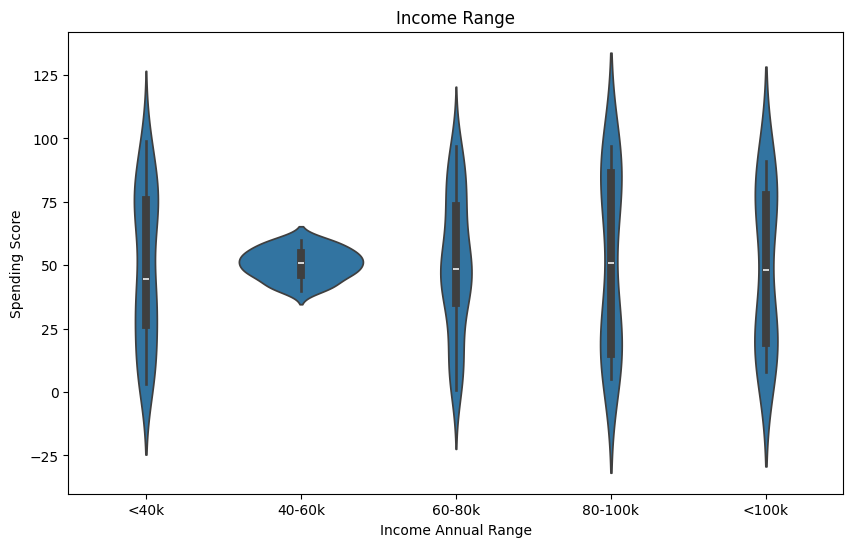

In [41]:
# Simular la random seed
np.random.seed(42)
plt.figure(figsize=(10,6))
df['IncomeRange'] = pd.cut(df['AnnualIncome'],
                           bins=[0,40,60,80,100,200],
                           labels=['<40k','40-60k','60-80k','80-100k','<100k'])
sns.violinplot(x='IncomeRange', y='SpendingScore', data=df)
plt.title('Income Range')
plt.xlabel('Income Annual Range')
plt.ylabel('Spending Score')
plt.show()

### 6. ¿Cuál es la proporción de clientes por género?
- **Objetivo**: Determinar el balance de género en el conjunto de datos.
- **Respuesta esperada**: Una gráfica de barras o un gráfico de pastel que muestre la proporción de hombres y mujeres.

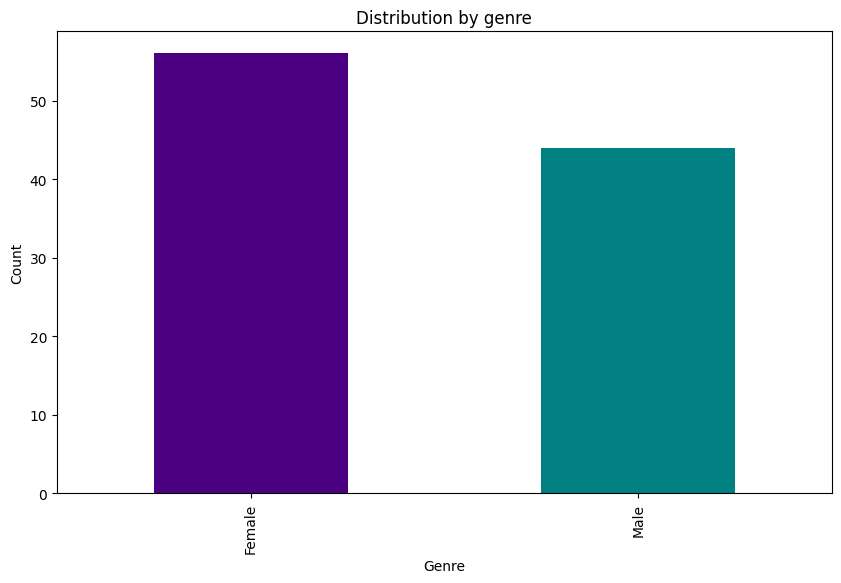

In [66]:
plt.figure(figsize=(10,6))
(df['Gender'].value_counts(normalize=True)*100).plot(kind='bar', color=['indigo', 'teal'])
plt.title('Distribution by genre')
plt.xlabel('Genre')
plt.ylabel('Count')

plt.show()

### 7. ¿Qué grupos de edad gastan más en promedio?
- **Objetivo**: Identificar los grupos de edad que tienen una mayor puntuación de gasto en promedio.
- **Respuesta esperada**: Una gráfica de barras que compare la puntuación de gasto promedio entre diferentes grupos de edad.

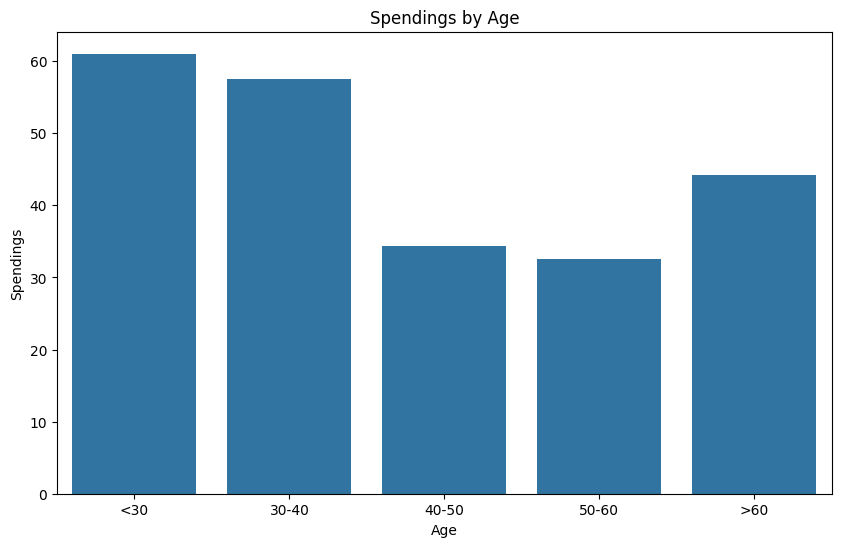

In [70]:
# Agrupar por edades
df['GruposEdad'] = pd.cut(df['Age'], bins=[0,30,40,50,60,100],
                          labels=['<30','30-40','40-50','50-60','>60'])

# Agrupar el average segun el match GruposEdad + SpendingScore
average_spending = df.groupby('GruposEdad')['SpendingScore'].mean().reset_index()

# Graficacion
plt.figure(figsize=(10,6))
sns.barplot(x='GruposEdad',y='SpendingScore',data=average_spending)
plt.title('Spendings by Age')
plt.xlabel('Age')
plt.ylabel('Spendings')
plt.show()

### 8. ¿Hay alguna relación entre la edad y el ingreso anual de los clientes?
- **Objetivo**: Explorar si hay una tendencia entre la edad de los clientes y sus ingresos.
- **Respuesta esperada**: Una gráfica de dispersión que muestre la relación entre Age y Annual Income (k$).

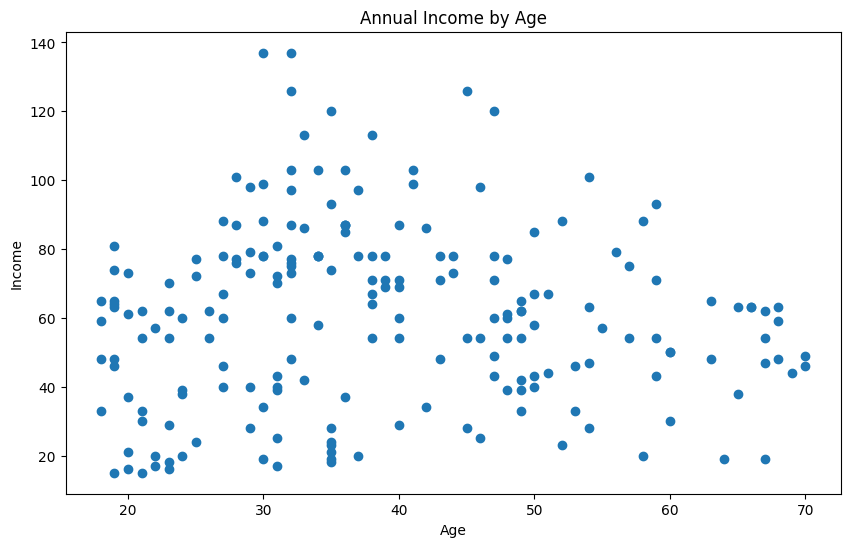

In [74]:
plt.figure(figsize=(10,6))
plt.scatter(df['Age'], df['AnnualIncome'])
plt.title('Annual Income by Age')
plt.xlabel('Age')
plt.ylabel('Income')
plt.show()

### 9. ¿Cuál es la distribución conjunta de la edad y el ingreso anual?
- **Objetivo**: Entender cómo se distribuyen estas dos variables en conjunto.
- **Respuesta esperada**: Una gráfica de dispersión con una densidad de puntos o un gráfico de hexágonos que muestre la distribución conjunta de Age y Annual Income (k$).

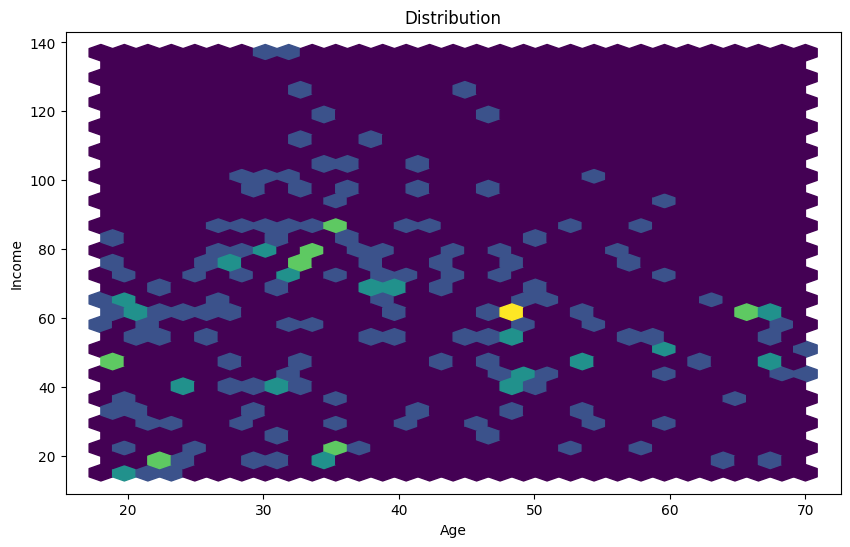

In [78]:
plt.figure(figsize=(10,6))
plt.hexbin(df['Age'], df['AnnualIncome'], gridsize=30)
plt.xlabel('Age')
plt.ylabel('Income')
plt.title('Distribution')
plt.show()

### 10. ¿Cómo se distribuyen los clientes en función de la puntuación de gasto y el género?
- **Objetivo**: Analizar la relación entre la puntuación de gasto y el género.
- **Respuesta esperada**: Una gráfica de dispersión o un gráfico de violín que muestre la Spending Score (1-100) separada por género.

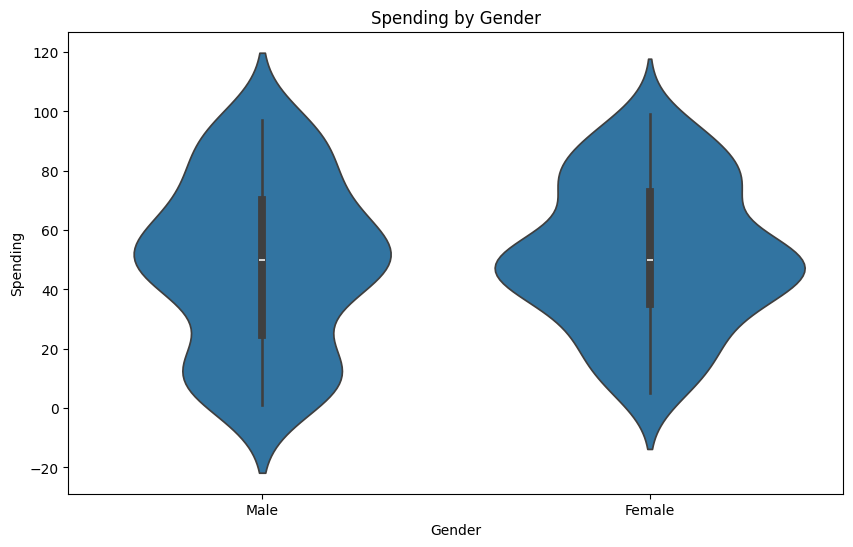

In [89]:
plt.figure(figsize=(10,6))
sns.violinplot(x='Gender', y='SpendingScore', data=df)
# plt.scatter(df['Gender'], df['SpendingScore'])
plt.title('Spending by Gender')
plt.xlabel('Gender')
plt.ylabel('Spending')
plt.show()